# Arbre de décision avec Python

In [1]:
# Chargement des librairies

import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.tree import export_text
from sklearn import metrics
import matplotlib.pyplot as plt

In [3]:
# choix du Working directory
os.chdir("D:\\Documents\\01 Docs\\Read\\Machine Learning Ricco Rakotomalala\\Machine Learning Analyse prédictive et scoring\\03 Arbres de décision - CHAID C4.5 et CART\\arbre_scikit_learn")

In [4]:
#importer les données
df = pd.read_excel("breast.xlsx",sheet_name = 0)

In [5]:
# Dimension du data frame
df.shape

(699, 10)

In [6]:
# Affichage des premières lignes
df.head()

,clump,ucellsize,ucellshape,mgadhesion,sepics,bnuclei,bchromatin,normnucl,mitoses,classe
0,4,2,2,1,2,1,2,1,1,begnin
1,1,1,1,1,2,1,2,1,1,begnin
2,2,1,1,1,2,1,2,1,1,begnin
3,10,6,6,2,4,10,9,7,1,malignant
4,4,1,1,1,2,1,2,1,1,begnin


In [7]:
# information sur les variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   clump       699 non-null    int64 
 1   ucellsize   699 non-null    int64 
 2   ucellshape  699 non-null    int64 
 3   mgadhesion  699 non-null    int64 
 4   sepics      699 non-null    int64 
 5   bnuclei     699 non-null    int64 
 6   bchromatin  699 non-null    int64 
 7   normnucl    699 non-null    int64 
 8   mitoses     699 non-null    int64 
 9   classe      699 non-null    object
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


In [9]:
# Vérifier la distribution absolue des classes
df.classe.value_counts()

begnin       458
malignant    241
Name: classe, dtype: int64

In [10]:
# la distribution relative
df.classe.value_counts(normalize=True)

begnin       0.655222
malignant    0.344778
Name: classe, dtype: float64

In [11]:
# Subdiviser les données en échantillons d'apprentissage et de test
dfTrain, dfTest = train_test_split(df,
                                   test_size=300,
                                   random_state=1,
                                   stratify=df.classe)

In [12]:
# Vérification des dimensions
print("les dimensions de l'ensemble d'apprentissage sont: ",dfTrain.shape)
print("les dimensions de l'ensemble de test sont: ",dfTest.shape)

les dimensions de l'ensemble d'apprentissage sont:  (399, 10)
les dimensions de l'ensemble de test sont:  (300, 10)


In [13]:
#vérification des distributions en apprentissage
dfTrain.classe.value_counts(normalize=True)

begnin       0.654135
malignant    0.345865
Name: classe, dtype: float64

In [14]:
#instanciation de l'arbre
arbreFirst = DecisionTreeClassifier(min_samples_split=30,
                                    min_samples_leaf=10)

In [15]:
#construction de l'arbre
arbreFirst.fit(X = dfTrain.iloc[:,:-1], y = dfTrain.classe)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=30,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

[Text(182.61818181818182, 195.696, 'ucellsize <= 3.5\ngini = 0.452\nsamples = 399\nvalue = [261, 138]'),
 Text(121.74545454545455, 152.208, 'bnuclei <= 6.0\ngini = 0.136\nsamples = 273\nvalue = [253, 20]'),
 Text(91.30909090909091, 108.72, 'ucellshape <= 3.5\ngini = 0.045\nsamples = 259\nvalue = [253, 6]'),
 Text(60.872727272727275, 65.232, 'bnuclei <= 3.5\ngini = 0.008\nsamples = 247\nvalue = [246, 1]'),
 Text(30.436363636363637, 21.744, 'gini = 0.0\nsamples = 232\nvalue = [232, 0]'),
 Text(91.30909090909091, 21.744, 'gini = 0.124\nsamples = 15\nvalue = [14, 1]'),
 Text(121.74545454545455, 65.232, 'gini = 0.486\nsamples = 12\nvalue = [7, 5]'),
 Text(152.1818181818182, 108.72, 'gini = 0.0\nsamples = 14\nvalue = [0, 14]'),
 Text(243.4909090909091, 152.208, 'ucellsize <= 4.5\ngini = 0.119\nsamples = 126\nvalue = [8, 118]'),
 Text(213.05454545454546, 108.72, 'gini = 0.393\nsamples = 26\nvalue = [7, 19]'),
 Text(273.92727272727274, 108.72, 'mgadhesion <= 2.5\ngini = 0.02\nsamples = 100\nva

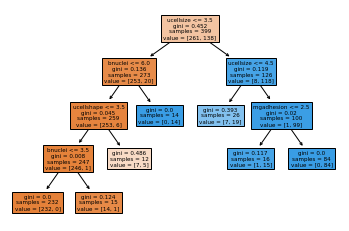

In [16]:
#affichage graphique de l'arbre - depuis sklearn 0.21

plot_tree(arbreFirst,feature_names = list(df.columns[:-1]),filled=True)

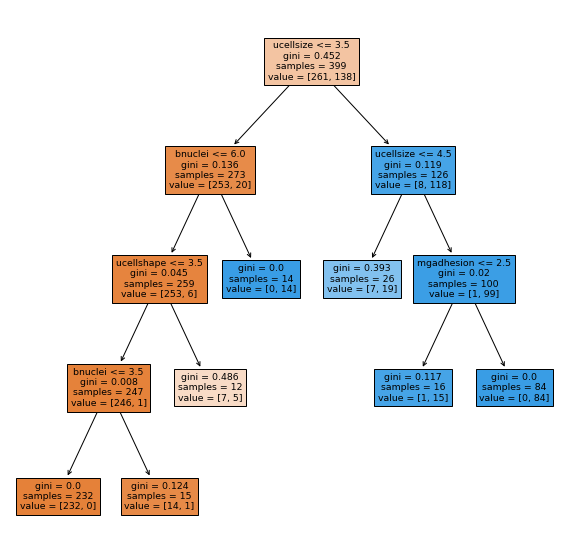

In [17]:
#affichage plus grand pour une meilleure lisibilité

plt.figure(figsize=(10,10))
plot_tree(arbreFirst,feature_names = list(df.columns[:-1]),filled=True)
plt.show()

In [18]:
#affichage sous forme de règles
#plus facile à appréhender quand l'arbre est très grand

tree_rules = export_text(arbreFirst,
                         feature_names = list(df.columns[:-1]),
                         show_weights=True)
tree_rules

'|--- ucellsize <= 3.50\n|   |--- bnuclei <= 6.00\n|   |   |--- ucellshape <= 3.50\n|   |   |   |--- bnuclei <= 3.50\n|   |   |   |   |--- weights: [232.00, 0.00] class: begnin\n|   |   |   |--- bnuclei >  3.50\n|   |   |   |   |--- weights: [14.00, 1.00] class: begnin\n|   |   |--- ucellshape >  3.50\n|   |   |   |--- weights: [7.00, 5.00] class: begnin\n|   |--- bnuclei >  6.00\n|   |   |--- weights: [0.00, 14.00] class: malignant\n|--- ucellsize >  3.50\n|   |--- ucellsize <= 4.50\n|   |   |--- weights: [7.00, 19.00] class: malignant\n|   |--- ucellsize >  4.50\n|   |   |--- mgadhesion <= 2.50\n|   |   |   |--- weights: [1.00, 15.00] class: malignant\n|   |   |--- mgadhesion >  2.50\n|   |   |   |--- weights: [0.00, 84.00] class: malignant\n'

In [19]:
print(tree_rules)

|--- ucellsize <= 3.50
|   |--- bnuclei <= 6.00
|   |   |--- ucellshape <= 3.50
|   |   |   |--- bnuclei <= 3.50
|   |   |   |   |--- weights: [232.00, 0.00] class: begnin
|   |   |   |--- bnuclei >  3.50
|   |   |   |   |--- weights: [14.00, 1.00] class: begnin
|   |   |--- ucellshape >  3.50
|   |   |   |--- weights: [7.00, 5.00] class: begnin
|   |--- bnuclei >  6.00
|   |   |--- weights: [0.00, 14.00] class: malignant
|--- ucellsize >  3.50
|   |--- ucellsize <= 4.50
|   |   |--- weights: [7.00, 19.00] class: malignant
|   |--- ucellsize >  4.50
|   |   |--- mgadhesion <= 2.50
|   |   |   |--- weights: [1.00, 15.00] class: malignant
|   |   |--- mgadhesion >  2.50
|   |   |   |--- weights: [0.00, 84.00] class: malignant



In [20]:
#importance des variables
impVarFirst = {"Variable":df.columns[:-1],"Importance":arbreFirst.feature_importances_}
pd.DataFrame(impVarFirst).sort_values(by="Importance",ascending=False)

,Variable,Importance
1,ucellsize,0.816627
5,bnuclei,0.158477
2,ucellshape,0.024243
3,mgadhesion,0.000653
0,clump,0.000000
4,sepics,0.000000
6,bchromatin,0.000000
7,normnucl,0.000000
8,mitoses,0.000000


In [21]:
#prédiction sur l'échantillon test
predFirst = arbreFirst.predict(X=dfTest.iloc[:,:-1])

#distribution des predictions
np.unique(predFirst,return_counts=True)

(array(['begnin', 'malignant'], dtype=object), array([199, 101], dtype=int64))

In [22]:
print(np.unique(predFirst,return_counts=True))

(array(['begnin', 'malignant'], dtype=object), array([199, 101], dtype=int64))


In [23]:
#matrice de confusion
metrics.confusion_matrix(dfTest.classe,predFirst)

array([[189,   8],
       [ 10,  93]], dtype=int64)

In [24]:
#taux de reconnaissance
metrics.accuracy_score(dfTest.classe,predFirst)

0.94

In [25]:
#taux d'erreur
1.0 - metrics.accuracy_score(dfTest.classe,predFirst)

0.06000000000000005

In [26]:
#rappel - sensibilité
metrics.recall_score(dfTest.classe,predFirst,pos_label='malignant')

0.9029126213592233

In [27]:
#précision
metrics.precision_score(dfTest.classe,predFirst,pos_label='malignant')

0.9207920792079208

In [28]:
#F1-score
metrics.f1_score(dfTest.classe,predFirst,pos_label='malignant')

0.911764705882353

In [30]:
#rapport de prédiction
print(metrics.classification_report(dfTest.classe,predFirst))

              precision    recall  f1-score   support

      begnin       0.95      0.96      0.95       197
   malignant       0.92      0.90      0.91       103

    accuracy                           0.94       300
   macro avg       0.94      0.93      0.93       300
weighted avg       0.94      0.94      0.94       300



In [31]:
#modifier les paramètres d'apprentissage
arbreSecond = DecisionTreeClassifier(min_samples_split=30,
                                     min_samples_leaf=10,
                                     max_leaf_nodes=3)

In [32]:
#construction de l'arbre
arbreSecond.fit(X = dfTrain.iloc[:,:-1], y = dfTrain.classe)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=3,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=30,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

[Text(200.88000000000002, 181.2, 'ucellsize <= 3.5\ngini = 0.452\nsamples = 399\nvalue = [261, 138]'),
 Text(133.92000000000002, 108.72, 'bnuclei <= 6.0\ngini = 0.136\nsamples = 273\nvalue = [253, 20]'),
 Text(66.96000000000001, 36.23999999999998, 'gini = 0.045\nsamples = 259\nvalue = [253, 6]'),
 Text(200.88000000000002, 36.23999999999998, 'gini = 0.0\nsamples = 14\nvalue = [0, 14]'),
 Text(267.84000000000003, 108.72, 'gini = 0.119\nsamples = 126\nvalue = [8, 118]')]

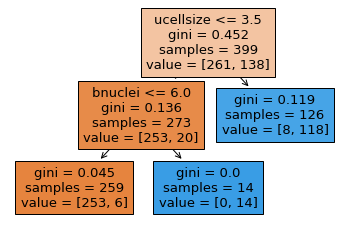

In [33]:
#affichage graphique de l'arbre
plot_tree(arbreSecond,feature_names = list(df.columns[:-1]),filled=True)

In [35]:
#importance des variables
impVarSecond = {"Variable":df.columns[:-1],"Importance":arbreSecond.feature_importances_}
pd.DataFrame(impVarSecond).sort_values(by="Importance",ascending=False)

,Variable,Importance
1,ucellsize,0.835229
5,bnuclei,0.164771
0,clump,0.000000
2,ucellshape,0.000000
3,mgadhesion,0.000000
4,sepics,0.000000
6,bchromatin,0.000000
7,normnucl,0.000000
8,mitoses,0.000000


In [36]:
#prédiction sur l'échantillon test
predSecond = arbreSecond.predict(X=dfTest.iloc[:,:-1])

In [37]:
#matrice de confusion
metrics.confusion_matrix(dfTest.classe,predSecond)

array([[189,   8],
       [ 10,  93]], dtype=int64)

In [38]:
#taux de reconnaissance
metrics.accuracy_score(dfTest.classe,predSecond)

0.94

***************************************************************************
<br>




***************************************************************************
<br>




***************************************************************************
<br>

# Arbre de décision "Heart"

In [40]:
#importation des données
dfHeart = pd.read_excel("heart_dataset.xlsx",sheet_name = 0)
dfHeart.head()

,age,sexe,type_douleur,pression,cholester,sucre,electro,taux_max,angine,depression,pic,vaisseau,coeur
0,58,masculin,D,100,234,A,A,156,non,1,1,B,presence
1,41,feminin,B,130,204,A,C,172,non,14,1,A,absence
2,58,masculin,D,150,270,A,C,111,oui,8,1,A,presence
3,53,masculin,D,140,203,B,C,155,oui,31,3,A,presence
4,41,masculin,C,130,214,A,C,168,non,20,2,A,absence


In [41]:
dfHeart.shape

(270, 13)

In [42]:
#liste des variables
print(dfHeart.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           270 non-null    int64 
 1   sexe          270 non-null    object
 2   type_douleur  270 non-null    object
 3   pression      270 non-null    int64 
 4   cholester     270 non-null    int64 
 5   sucre         270 non-null    object
 6   electro       270 non-null    object
 7   taux_max      270 non-null    int64 
 8   angine        270 non-null    object
 9   depression    270 non-null    int64 
 10  pic           270 non-null    int64 
 11  vaisseau      270 non-null    object
 12  coeur         270 non-null    object
dtypes: int64(6), object(7)
memory usage: 27.5+ KB
None


In [43]:
#liste des variables quanlitative

lstQuali =  [var for var in dfHeart.columns[:-1] 
             if dfHeart[var].dtype == np.object_]
print(lstQuali)

['sexe', 'type_douleur', 'sucre', 'electro', 'angine', 'vaisseau']


In [44]:
#recoder en 0/1 ces variables
dfQualiEncoded = pd.get_dummies(dfHeart[lstQuali])
dfQualiEncoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   sexe_feminin    270 non-null    uint8
 1   sexe_masculin   270 non-null    uint8
 2   type_douleur_A  270 non-null    uint8
 3   type_douleur_B  270 non-null    uint8
 4   type_douleur_C  270 non-null    uint8
 5   type_douleur_D  270 non-null    uint8
 6   sucre_A         270 non-null    uint8
 7   sucre_B         270 non-null    uint8
 8   electro_A       270 non-null    uint8
 9   electro_B       270 non-null    uint8
 10  electro_C       270 non-null    uint8
 11  angine_non      270 non-null    uint8
 12  angine_oui      270 non-null    uint8
 13  vaisseau_A      270 non-null    uint8
 14  vaisseau_B      270 non-null    uint8
 15  vaisseau_C      270 non-null    uint8
 16  vaisseau_D      270 non-null    uint8
dtypes: uint8(17)
memory usage: 4.6 KB


In [45]:
print(dfQualiEncoded.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   sexe_feminin    270 non-null    uint8
 1   sexe_masculin   270 non-null    uint8
 2   type_douleur_A  270 non-null    uint8
 3   type_douleur_B  270 non-null    uint8
 4   type_douleur_C  270 non-null    uint8
 5   type_douleur_D  270 non-null    uint8
 6   sucre_A         270 non-null    uint8
 7   sucre_B         270 non-null    uint8
 8   electro_A       270 non-null    uint8
 9   electro_B       270 non-null    uint8
 10  electro_C       270 non-null    uint8
 11  angine_non      270 non-null    uint8
 12  angine_oui      270 non-null    uint8
 13  vaisseau_A      270 non-null    uint8
 14  vaisseau_B      270 non-null    uint8
 15  vaisseau_C      270 non-null    uint8
 16  vaisseau_D      270 non-null    uint8
dtypes: uint8(17)
memory usage: 4.6 KB
None


In [46]:
#liste des variables quanti
lstQuanti = [var for var in dfHeart.columns[:-1] if dfHeart[var].dtype != np.object_]
lstQuanti

['age', 'pression', 'cholester', 'taux_max', 'depression', 'pic']

In [47]:
#réunir dummies et quanti dans le même data frame
dfNew = pd.concat([dfQualiEncoded,dfHeart[lstQuanti]],axis=1)
dfNew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   sexe_feminin    270 non-null    uint8
 1   sexe_masculin   270 non-null    uint8
 2   type_douleur_A  270 non-null    uint8
 3   type_douleur_B  270 non-null    uint8
 4   type_douleur_C  270 non-null    uint8
 5   type_douleur_D  270 non-null    uint8
 6   sucre_A         270 non-null    uint8
 7   sucre_B         270 non-null    uint8
 8   electro_A       270 non-null    uint8
 9   electro_B       270 non-null    uint8
 10  electro_C       270 non-null    uint8
 11  angine_non      270 non-null    uint8
 12  angine_oui      270 non-null    uint8
 13  vaisseau_A      270 non-null    uint8
 14  vaisseau_B      270 non-null    uint8
 15  vaisseau_C      270 non-null    uint8
 16  vaisseau_D      270 non-null    uint8
 17  age             270 non-null    int64
 18  pression        270 non-null  

In [48]:
dfNew.head()

,sexe_feminin,sexe_masculin,type_douleur_A,type_douleur_B,type_douleur_C,type_douleur_D,sucre_A,sucre_B,electro_A,electro_B,...,vaisseau_A,vaisseau_B,vaisseau_C,vaisseau_D,age,pression,cholester,taux_max,depression,pic
0,0,1,0,0,0,1,1,0,1,0,...,0,1,0,0,58,100,234,156,1,1
1,1,0,0,1,0,0,1,0,0,0,...,1,0,0,0,41,130,204,172,14,1
2,0,1,0,0,0,1,1,0,0,0,...,1,0,0,0,58,150,270,111,8,1
3,0,1,0,0,0,1,0,1,0,0,...,1,0,0,0,53,140,203,155,31,3
4,0,1,0,0,1,0,1,0,0,0,...,1,0,0,0,41,130,214,168,20,2


In [49]:
#rajouter la variable cible
dfNew['coeur'] = dfHeart.coeur
print(dfNew.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   sexe_feminin    270 non-null    uint8 
 1   sexe_masculin   270 non-null    uint8 
 2   type_douleur_A  270 non-null    uint8 
 3   type_douleur_B  270 non-null    uint8 
 4   type_douleur_C  270 non-null    uint8 
 5   type_douleur_D  270 non-null    uint8 
 6   sucre_A         270 non-null    uint8 
 7   sucre_B         270 non-null    uint8 
 8   electro_A       270 non-null    uint8 
 9   electro_B       270 non-null    uint8 
 10  electro_C       270 non-null    uint8 
 11  angine_non      270 non-null    uint8 
 12  angine_oui      270 non-null    uint8 
 13  vaisseau_A      270 non-null    uint8 
 14  vaisseau_B      270 non-null    uint8 
 15  vaisseau_C      270 non-null    uint8 
 16  vaisseau_D      270 non-null    uint8 
 17  age             270 non-null    int64 
 18  pression  

In [50]:
#instanciation de l'arbre

arbreHeart = DecisionTreeClassifier(max_depth = 2)

In [51]:
#construction de l'arbre
arbreHeart.fit(X = dfNew.iloc[:,:-1], y = dfNew.coeur)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

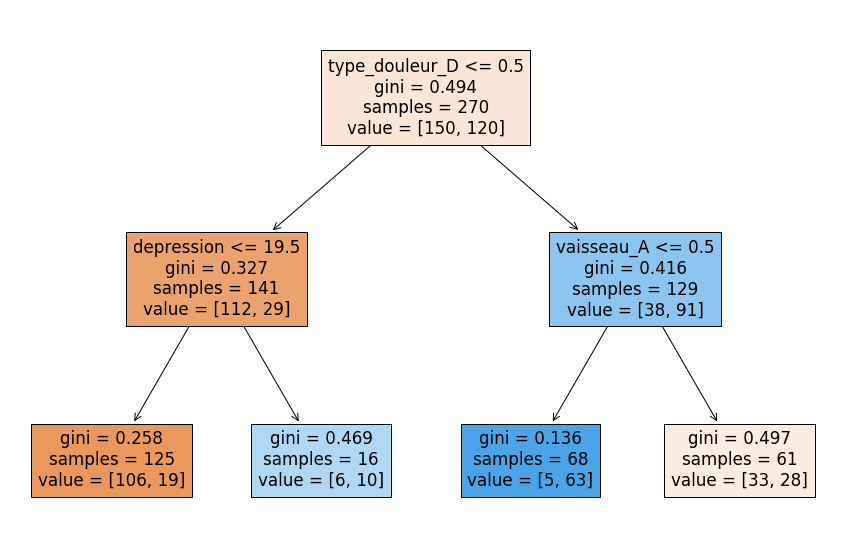

In [52]:
#affichage graphique de l'arbre - depuis sklearn 0.21

plt.figure(figsize=(15,10))
plot_tree(arbreHeart,feature_names = list(dfNew.columns[:-1]),filled=True)
plt.show()

***************************************************************************
<br>




***************************************************************************
<br>




***************************************************************************
<br>

# Arbre de décision "Vote"

In [53]:
#importer les données

dfVote = pd.read_excel("vote_simplified.xlsx",sheet_name = 0)

#dimensions
dfVote.shape

(435, 7)

In [54]:
#liste et type des variables
dfVote.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   adoption_of_the_budget_re  435 non-null    object
 1   physician_fee_freeze       435 non-null    object
 2   mx_missile                 435 non-null    object
 3   superfund_right_to_sue     435 non-null    object
 4   crime                      435 non-null    object
 5   duty_free_exports          435 non-null    object
 6   groupe                     435 non-null    object
dtypes: object(7)
memory usage: 23.9+ KB


In [55]:
# Affichage des premières lignes
dfVote.head()

,adoption_of_the_budget_re,physician_fee_freeze,mx_missile,superfund_right_to_sue,crime,duty_free_exports,groupe
0,n,y,n,y,y,n,republican
1,n,y,n,y,y,n,republican
2,y,_?,n,y,y,n,democrat
3,y,n,n,y,n,n,democrat
4,y,n,n,y,y,y,democrat


In [56]:
#instanciation de l'arbre

arbreVote = DecisionTreeClassifier(max_depth = 3)

In [57]:
#construction de l'arbre
arbreVote.fit(X = dfVote.iloc[:,:-1], y = dfVote.groupe)

ValueError: could not convert string to float: 'n'

In [58]:
#liste des variables
dfVote.columns

Index(['adoption_of_the_budget_re', 'physician_fee_freeze', 'mx_missile',
       'superfund_right_to_sue', 'crime', 'duty_free_exports', 'groupe'],
      dtype='object')

In [59]:
#encodage des prédictives
dfVoteBis = pd.get_dummies(dfVote[dfVote.columns[:-1]])
print(dfVoteBis.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   adoption_of_the_budget_re__?  435 non-null    uint8
 1   adoption_of_the_budget_re_n   435 non-null    uint8
 2   adoption_of_the_budget_re_y   435 non-null    uint8
 3   physician_fee_freeze__?       435 non-null    uint8
 4   physician_fee_freeze_n        435 non-null    uint8
 5   physician_fee_freeze_y        435 non-null    uint8
 6   mx_missile__?                 435 non-null    uint8
 7   mx_missile_n                  435 non-null    uint8
 8   mx_missile_y                  435 non-null    uint8
 9   superfund_right_to_sue__?     435 non-null    uint8
 10  superfund_right_to_sue_n      435 non-null    uint8
 11  superfund_right_to_sue_y      435 non-null    uint8
 12  crime__?                      435 non-null    uint8
 13  crime_n                       435 n

In [60]:
#répartition de la variable crime par ex.
print(dfVote['crime'].value_counts(normalize=True))

y     0.570115
n     0.390805
_?    0.039080
Name: crime, dtype: float64


In [61]:
#moyennes par variables -- proportions
print(dfVoteBis.apply(func='mean',axis=0))

adoption_of_the_budget_re__?    0.025287
adoption_of_the_budget_re_n     0.393103
adoption_of_the_budget_re_y     0.581609
physician_fee_freeze__?         0.025287
physician_fee_freeze_n          0.567816
physician_fee_freeze_y          0.406897
mx_missile__?                   0.050575
mx_missile_n                    0.473563
mx_missile_y                    0.475862
superfund_right_to_sue__?       0.057471
superfund_right_to_sue_n        0.462069
superfund_right_to_sue_y        0.480460
crime__?                        0.039080
crime_n                         0.390805
crime_y                         0.570115
duty_free_exports__?            0.064368
duty_free_exports_n             0.535632
duty_free_exports_y             0.400000
dtype: float64


In [62]:
#ajouter la variabgle 'groupe'
dfVoteBis['groupe'] = dfVote.groupe
print(dfVoteBis.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   adoption_of_the_budget_re__?  435 non-null    uint8 
 1   adoption_of_the_budget_re_n   435 non-null    uint8 
 2   adoption_of_the_budget_re_y   435 non-null    uint8 
 3   physician_fee_freeze__?       435 non-null    uint8 
 4   physician_fee_freeze_n        435 non-null    uint8 
 5   physician_fee_freeze_y        435 non-null    uint8 
 6   mx_missile__?                 435 non-null    uint8 
 7   mx_missile_n                  435 non-null    uint8 
 8   mx_missile_y                  435 non-null    uint8 
 9   superfund_right_to_sue__?     435 non-null    uint8 
 10  superfund_right_to_sue_n      435 non-null    uint8 
 11  superfund_right_to_sue_y      435 non-null    uint8 
 12  crime__?                      435 non-null    uint8 
 13  crime_n             

In [63]:
#réinstancier l'arbre de décision
arbreVote = DecisionTreeClassifier(max_depth = 3)

#construction de l'arbre
arbreVote.fit(X = dfVoteBis.iloc[:,:-1], y = dfVoteBis.groupe)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

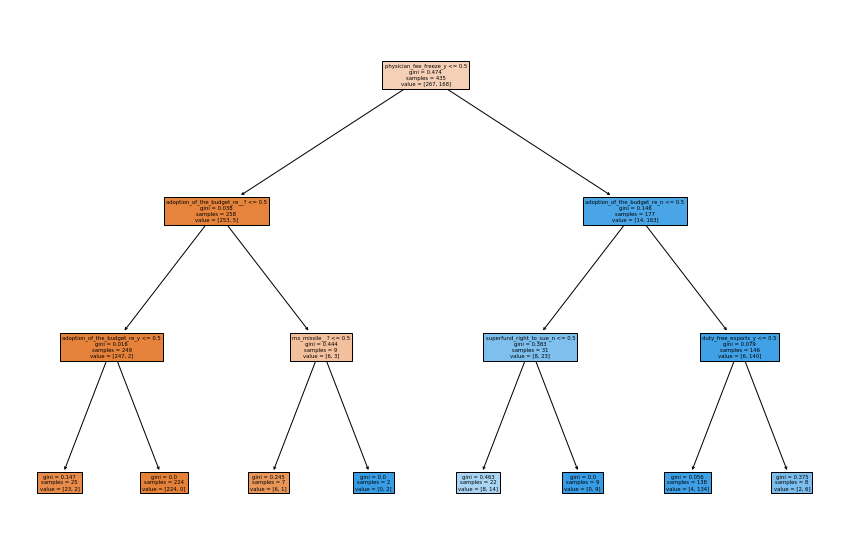

In [68]:
#affichage graphique de l'arbre - depuis sklearn 0.21

plt.figure(figsize=(15,10))
plot_tree(arbreVote,
          feature_names = list(dfVoteBis.columns[:-1]),
          filled=True)
plt.show()